# Matrix determinants

A determinant is a scalar value that can be computed from the elements of a square matrix.

Characteristics of matrix determinants:
- map a square matrix to a scalar
- enables to determine if a matrix can be inverted
- for a matrix $X$, the determinant is denoted as $det(X)$ or $|X|$
- if $det(X) = 0$:
    - $X^{-1}$ cannot be computed ($X^{-1}$ has $1/det(X) = 1/0$ and we cannot divide by zero)
    - while square, matrix $X$ is singular: it contains linearly dependent columns
- $det(X) is easiest to compute for 2x2 matrices:

$$\boldsymbol{X} = \begin{bmatrix}
    a & b \\
    c & d
\end{bmatrix}$$

$$\boldsymbol{|X|} = ad - bc$$

### Matrix determinants with Python

#### 2x2 Matrices

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import tensorflow as tf

In [3]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [4]:
np.linalg.det(X)

-2.0000000000000013

In [5]:
N = np.array([[-4, 1], [-8, 2]])
N

array([[-4,  1],
       [-8,  2]])

In [6]:
np.linalg.det(N)

0.0

Since $det(\boldsymbol{N}) = 0$, trying to use `np.linalg.inv(N)` will raise an error: `LinAlgError: Singular matrix`

In [8]:
N = torch.tensor([[-4, 1], [-8, 2.]])

In [9]:
torch.linalg.det(N)

tensor(-0.)

### Generalized determinants: recursion

The Laplace expansion is a formula that allows us to express the determinant of a matrix as a linear combination of determinants of smaller matrices, called minors.

It is computed recursively by expanding the determinant along a row or column.

Say we have a matrix $X$ of size 5x5:

$$\boldsymbol{X} = \begin{bmatrix}
    a_{1,1} & a_{1,2} & a_{1,3} & a_{1,4} & a_{1,5} \\
    a_{2,1} & a_{2,2} & a_{2,3} & a_{2,4} & a_{2,5} \\
    a_{3,1} & a_{3,2} & a_{3,3} & a_{3,4} & a_{3,5} \\
    a_{4,1} & a_{4,2} & a_{4,3} & a_{4,4} & a_{4,5} \\
    a_{5,1} & a_{5,2} & a_{5,3} & a_{5,4} & a_{5,5}
\end{bmatrix}$$

$|X|$ can be computed as:

$|X| = a_{1,1}det(X_{1,1}) - a_{1,2}det(X_{1,2}) + a_{1,3}det(X_{1,3}) - a_{1,4}det(X_{1,4}) + a_{1,5}det(X_{1,5})$


In [10]:
X = np.array([[1, 2, 4], [2, -1, 3], [0, 5, 1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [11]:
np.linalg.det(X)

19.999999999999996

In [13]:
A = np.array([[25,2], [3,4]])
np.linalg.det(A)

94.0

In [14]:
B = np.array([[-2, 0], [0, -2]])
np.linalg.det(B)

4.0

In [16]:
C = np.array([[2, 1, -3], [4, -5, 2],[0, -1, 3]])
np.linalg.det(C)

-26.000000000000014

## Derminants and eigenvalues

The determinant of a matrix is the product of its eigenvalues.

Since NumPy uses different algorithms to compute the determinant and eigenvalues, the result of the eigenvalue computation may not be exactly equal to the determinant. PyTorch uses the same algorithm for both.

In [32]:
lambdas, V = np.linalg.eig(X)
lambdas

array([-3.25599251, -1.13863631,  5.39462882])

In [34]:
np.prod(lambdas)

20.000000000000007

In [40]:
X_pt = torch.tensor(X, dtype=torch.float32)
eigenvalues, eigenvectors = torch.linalg.eig(X_pt)
eigenvec = eigenvectors.real
eigenvals = eigenvalues.real

In [42]:
torch.det(X_pt)

tensor(20.)

In [44]:
torch.prod(eigenvals)

tensor(20.0000)

The absolute value of the determinant of $\boldsymbol{X}$ - $|det(\boldsymbol{X})|$ -  quantifies the volume change as a result of applying $\boldsymbol{X}$:
- If $|det(\boldsymbol{X})| = 0$, then $\boldsymbol{X}$ collapses space completely in at least one dimension, thereby eliminating all volume
- If $0 < | det(\boldsymbol{X})| < 1$, then $\boldsymbol{X}$ contracts the volume to some extent
- If $|det(\boldsymbol{X})| = 1$, then $\boldsymbol{X}$ preserves the volume
- If $|det(\boldsymbol{X})| > 1$, then $\boldsymbol{X}$ expands the volume

In [46]:
torch.abs(torch.det(X_pt))

tensor(20.)

In [52]:
D = torch.tensor([[1, 0], [0, 1]], dtype=torch.float32)
D

tensor([[1., 0.],
        [0., 1.]])

In [76]:
def plot_vectors(vectors, colors, labels=None):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each.

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]]
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    labels: list, optional
        Labels for the vectors to show in the legend. If None, no legend is shown.

    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'], ['Vector 1', 'Vector 2'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    #plt.figure()
    plt.grid(alpha=0.2)
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    # If labels are not provided, create empty labels
    if labels is None:
        labels = [f"Vector {i+1}" for i in range(len(vectors))]

    for i in range(len(vectors)):
        x = np.concatenate([[0,0], vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],
                   label=labels[i])

    # Add the legend
    plt.legend(loc='best')

def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

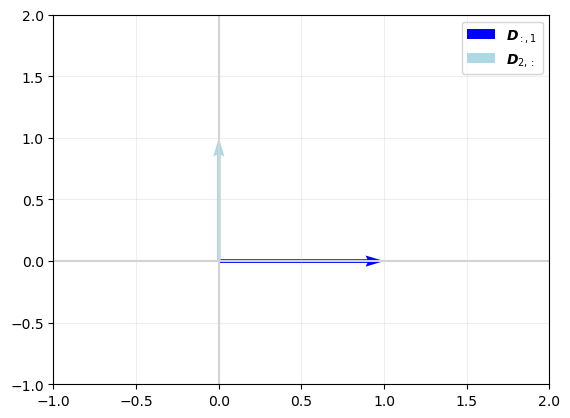

In [77]:
plot_vectors([D[:,0], D[:,1]], ['blue', 'lightblue'], [r'$\boldsymbol{D}_{:, 1}$', r'$\boldsymbol{D}_{2,:}$'])
plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)

Let's apply the matrix $N$ (a singular matrix) to $D$:

In [78]:
ND = torch.matmul(N, D)
ND

tensor([[-4.,  1.],
        [-8.,  2.]])

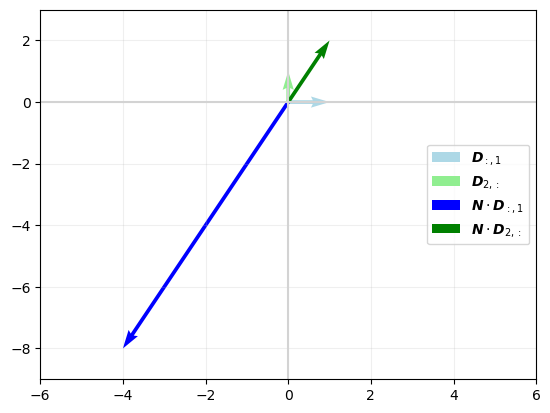

In [82]:
plot_vectors([vectorfy(D, 0), vectorfy(D, 1), vectorfy(ND, 0), vectorfy(ND, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'], [r'$\boldsymbol{D}_{:, 1}$', r'$\boldsymbol{D}_{2,:}$', r'$\boldsymbol{N} \cdot \boldsymbol{D}_{:, 1}$', r'$\boldsymbol{N} \cdot \boldsymbol{D}_{2,:}$'])
plt.xlim(-6, 6)
_ = plt.ylim(-9, 3)
plt.legend(loc='right')
plt.show()

If any one of a matrix's eigenvalues is zero, then the product of the eigenvalues must be zero and the determinant must also be zero

In [93]:
eigenvalues, eigenvectors = torch.linalg.eig(N)
eigenvalues.real

tensor([-2.,  0.])

Now let's apply $\boldsymbol{I}$ (the identity matrix, with $det(\boldsymbol{I}) = 1$) to $D$:

In [97]:
I = torch.tensor([[1, 0], [0, 1]], dtype=torch.float32)
I

tensor([[1., 0.],
        [0., 1.]])

In [98]:
torch.det(I)

tensor(1.)

In [99]:
ID = torch.matmul(I, D)
ID

tensor([[1., 0.],
        [0., 1.]])

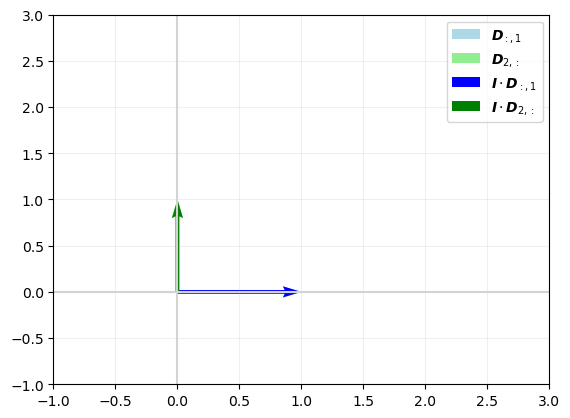

In [100]:
plot_vectors([vectorfy(D, 0), vectorfy(D, 1), vectorfy(ID, 0), vectorfy(ID, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'], [r'$\boldsymbol{D}_{:, 1}$', r'$\boldsymbol{D}_{2,:}$', r'$\boldsymbol{I} \cdot \boldsymbol{D}_{:, 1}$', r'$\boldsymbol{I} \cdot \boldsymbol{D}_{2,:}$'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)
plt.show()

In [101]:
eigenvalues, eigenvectors = torch.linalg.eig(I)
eigenvalues.real

tensor([1., 1.])

Let's apply the matrix $\boldsymbol{J}$ to $D$:

In [102]:
J = torch.tensor([[-0.5, 0],[0,2]])
J

tensor([[-0.5000,  0.0000],
        [ 0.0000,  2.0000]])

In [103]:
torch.det(J)

tensor(-1.)

In [104]:
torch.abs(torch.det(J))

tensor(1.)

In [105]:
JD = torch.matmul(J, D)
JD

tensor([[-0.5000,  0.0000],
        [ 0.0000,  2.0000]])

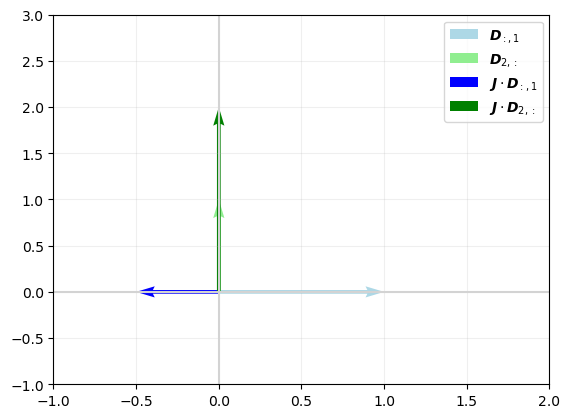

In [107]:
plot_vectors([vectorfy(D, 0), vectorfy(D, 1), vectorfy(JD, 0), vectorfy(JD, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'], [r'$\boldsymbol{D}_{:, 1}$', r'$\boldsymbol{D}_{2,:}$', r'$\boldsymbol{J} \cdot \boldsymbol{D}_{:, 1}$', r'$\boldsymbol{J} \cdot \boldsymbol{D}_{2,:}$'])
plt.xlim(-1, 2)
_ = plt.ylim(-1, 3)
plt.show()

In [108]:
eigenvalues, eigenvectors = torch.linalg.eig(J)
eigenvalues.real

tensor([-0.5000,  2.0000])

Let's apply the matrix $\boldsymbol{F}$ to $D$:

In [110]:
F = I * 2
F

tensor([[2., 0.],
        [0., 2.]])

In [111]:
torch.det(F)

tensor(4.)

In [112]:
FD = torch.matmul(F, D)
FD

tensor([[2., 0.],
        [0., 2.]])

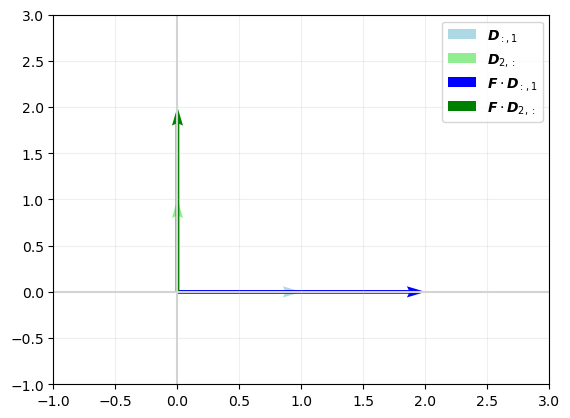

In [113]:
plot_vectors([vectorfy(D, 0), vectorfy(D, 1), vectorfy(FD, 0), vectorfy(FD, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'], [r'$\boldsymbol{D}_{:, 1}$', r'$\boldsymbol{D}_{2,:}$', r'$\boldsymbol{F} \cdot \boldsymbol{D}_{:, 1}$', r'$\boldsymbol{F} \cdot \boldsymbol{D}_{2,:}$'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)
plt.show()

In [114]:
eigenvalues, eigenvectors = torch.linalg.eig(F)
eigenvalues.real

tensor([2., 2.])